In [1]:
import os
import uproot
import numpy as np

import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
# o stands for "old"
ofname = os.path.expandvars("$LUSTRE/CProfiles_old/e-/tuning/cprofiles_integrals.root")
fname  = os.path.expandvars("$LUSTRE/CProfiles/e-/tuning/cprofiles_integrals.root")

# of = uproot.open(ofname)
f  = uproot.open(fname)

In [3]:
n = 0
# oh, or0bins, oth0bins, oebins = of[f"I_{n}"].to_numpy()
h ,  r0bins,  th0bins,  ebins =  f[f"I_{n}"].to_numpy()

# np.testing.assert_allclose( or0bins, r0bins)
# np.testing.assert_allclose(oth0bins, th0bins)

In [4]:
# plt.figure(figsize=[4, 3])

# plt.title(f"Ratio new/old for Integral n={n}")

# plt.hist((h/oh).flatten(), histtype="step", bins=20, color="k")
# plt.xlabel("ratio")

# plt.xlim(0, 1.02)
# plt.tight_layout()

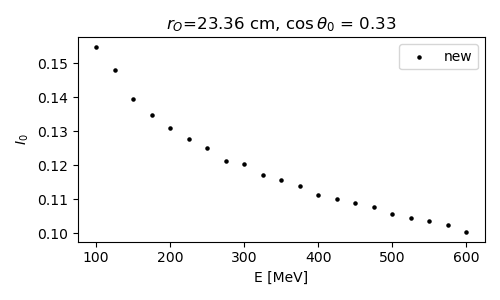

In [17]:
r0bin  = np.random.randint(len(r0bins)-1)
th0bin = np.random.randint(len(th0bins)-1)

plt.figure(figsize=[5, 3])

plt.title(rf"$r_O$={round(r0bins[r0bin]/10, 2)} cm, $\cos \theta_0$ = {round(th0bins[th0bin], 2)}")

es = (ebins[1:] + ebins[:-1])/2.
plt.scatter(es, h[r0bin, th0bin], label="new", color="k", s=5)

# es = (oebins[1:] + oebins[:-1])/2.
# plt.scatter(es, oh[r0bin, th0bin], label="old", edgecolor="red", c="none", s=5)

plt.xlabel("E [MeV]")
plt.ylabel(rf"$I_{n}$")
plt.legend()
plt.tight_layout()

In [19]:
iso , ebins  =  f["I_iso_2"].to_numpy()
# oiso, oebins = of["I_iso_2"].to_numpy()

# np.testing.assert_allclose(oiso, iso)

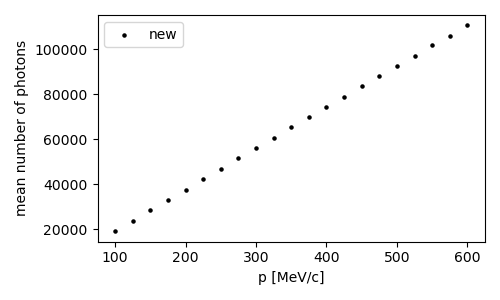

In [20]:
e, nph   = f["gNphot"] .values()
# oe, onph = of["gNphot"].values()

#np.testing.assert_allclose(oe, e)
#np.testing.assert_allclose(onph, nph)

plt.figure(figsize=[5, 3])
plt.scatter( e,  nph, label="new", color="k", s=5)
# plt.scatter(oe, onph, label="old", edgecolor="red", c="none", s=5)
plt.legend()
plt.xlabel("p [MeV/c]")
plt.ylabel("mean number of photons")
plt.tight_layout()

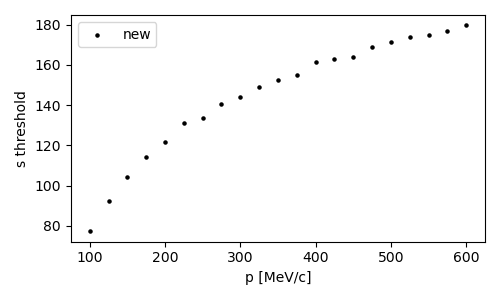

In [21]:
e, sth   = f["gsthr"] .values()
# oe, osth = of["gsthr"].values()

plt.figure(figsize=[5, 3])
plt.scatter( e,  sth, label="new", color="k", s=5)
# plt.scatter(oe, osth, label="old", edgecolor="red", c="none", s=5)
plt.legend()
plt.xlabel("p [MeV/c]")
plt.ylabel("s threshold")
plt.tight_layout()